In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/Dataset.csv")

In [3]:
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


Checking number of rows and columns

In [ ]:
df.shape

(442, 11)

In [ ]:
df

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


#Question 1: Prep the data in order to be ready to be fed to a model.

Data cleaning and preprocessing

In [ ]:
null_values = df.isnull().sum()
print(null_values)

AGE    0
SEX    0
BMI    0
BP     0
S1     0
S2     0
S3     0
S4     0
S5     0
S6     0
Y      0
dtype: int64


It is observed that there are no null values in the dataset

Displaying the dataframe

In [32]:
df.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


ii) Finding the outliers in the dataset

In [22]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
Q1,Q3

(AGE     38.2500
 SEX      1.0000
 BMI     23.2000
 BP      84.0000
 S1     164.2500
 S2      96.0500
 S3      40.2500
 S4       3.0000
 S5       4.2767
 S6      83.2500
 Y       87.0000
 Name: 0.25, dtype: float64,
 AGE     59.0000
 SEX      2.0000
 BMI     29.2750
 BP     105.0000
 S1     209.7500
 S2     134.5000
 S3      57.7500
 S4       5.0000
 S5       4.9972
 S6      98.0000
 Y      211.5000
 Name: 0.75, dtype: float64)

In [24]:
IQR=Q3-Q1
IQR

,0
AGE,20.7500
SEX,1.0000
BMI,6.0750
BP,21.0000
S1,45.5000
S2,38.4500
S3,17.5000
S4,2.0000
S5,0.7205
S6,14.7500


In [30]:
outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

outliers

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
437,False,False,False,False,False,False,False,False,False,False,False
438,False,False,False,False,False,False,False,False,False,False,False
439,False,False,False,False,False,False,False,False,False,False,False
440,False,False,False,False,False,False,False,False,False,False,False


Checking in each column how many outliers are there

In [31]:
outliers_per_column = outliers.sum()
outliers_per_column

,0
AGE,0
SEX,0
BMI,3
BP,0
S1,8
S2,7
S3,7
S4,2
S5,4
S6,9


While performing the EDA, the boxplot of every column having outliers is displayed

# Question 2: List all types of data, numeric, categorical,..
Checking datatypes of each column

In [4]:
df.dtypes

,0
AGE,int64
SEX,int64
BMI,float64
BP,float64
S1,int64
S2,float64
S3,float64
S4,float64
S5,float64
S6,int64


By looking at the datatypes in each column, we do not need to transform data as all values are numerical.

Displaying the dataframe

In [6]:
df.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


# Question 3: EDA on data

Exploratory data analysis for checking distribution and displaying outliers

"Checking skenwness using normal distribution and Boxplot for outliers"




 > **A "good" skewness percentage is generally considered to be between -0.5 and 0.5. We can say AGE column is fairly symmetrical**

AGE

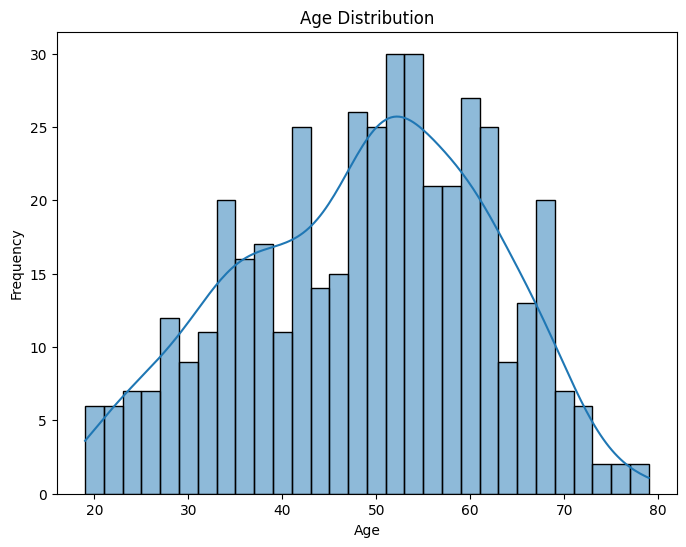

Statistic: 0.982357643169615
p-value: 3.278251483475348e-05
Data does not look Gaussian (reject H0)


In [100]:
from scipy import stats

# Plotting the distribution of the AGE column
plt.figure(figsize=(8,6))
sns.histplot(df['AGE'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Normality test
stat, p_value = stats.shapiro(df['AGE'])

print(f'Statistic: {stat}')
print(f'p-value: {p_value}')

# Interpret the p-value
alpha = 0.05
if p_value > alpha:
    print("Data looks Gaussian (fail to reject H0)")
else:
    print("Data does not look Gaussian (reject H0)")


The Age column is close to being normally distributed but it is not

count    442.000000
mean      48.518100
std       13.109028
min       19.000000
25%       38.250000
50%       50.000000
75%       59.000000
max       79.000000
Name: AGE, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


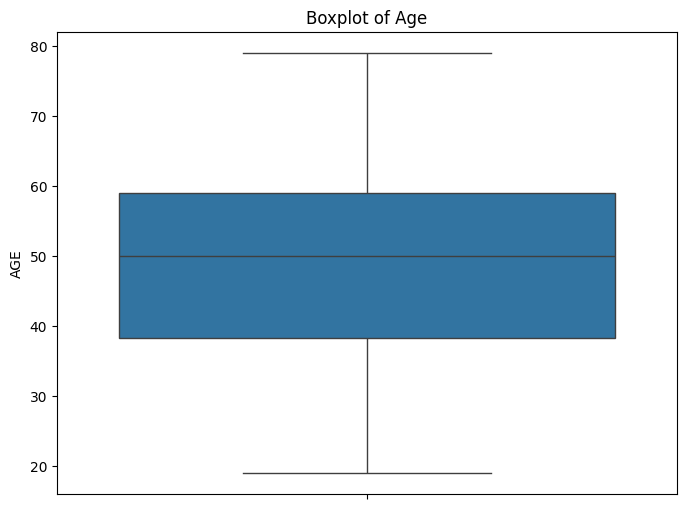

In [95]:
# Boxplot
print(df['AGE'].describe())
plt.figure(figsize=(8,6))
sns.boxplot(df['AGE'])
plt.title('Boxplot of Age')
plt.show()


By seeing the boxplot , we can say that the average age and median are close, indicating that the data is close to being normally distributed

BMI

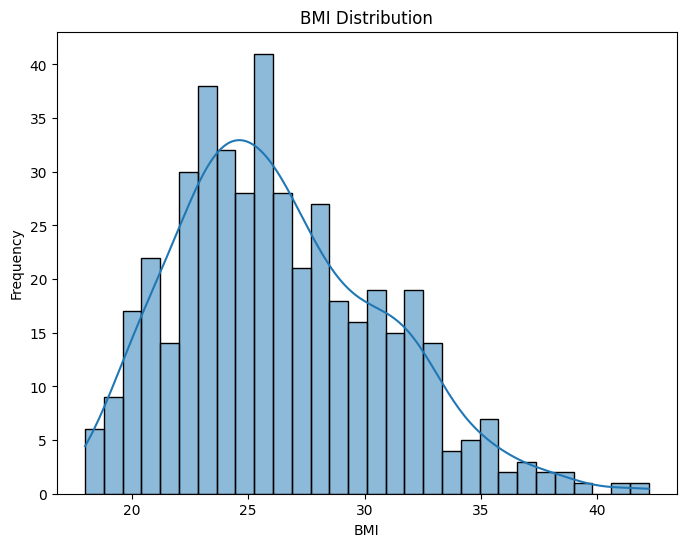

Statistic: 0.9728212363035977
p-value: 2.519594252400323e-07
Data does not look Gaussian (reject H0)


In [101]:
# Plotting the distribution of the BMI column
plt.figure(figsize=(8,6))
sns.histplot(df['BMI'], kde=True, bins=30)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

# Normality test
stat, p_value = stats.shapiro(df['BMI'])

print(f'Statistic: {stat}')
print(f'p-value: {p_value}')

# Interpret the p-value
alpha = 0.05
if p_value > alpha:
    print("Data looks Gaussian (fail to reject H0)")
else:
    print("Data does not look Gaussian (reject H0)")


count    442.000000
mean      26.375792
std        4.418122
min       18.000000
25%       23.200000
50%       25.700000
75%       29.275000
max       42.200000
Name: BMI, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


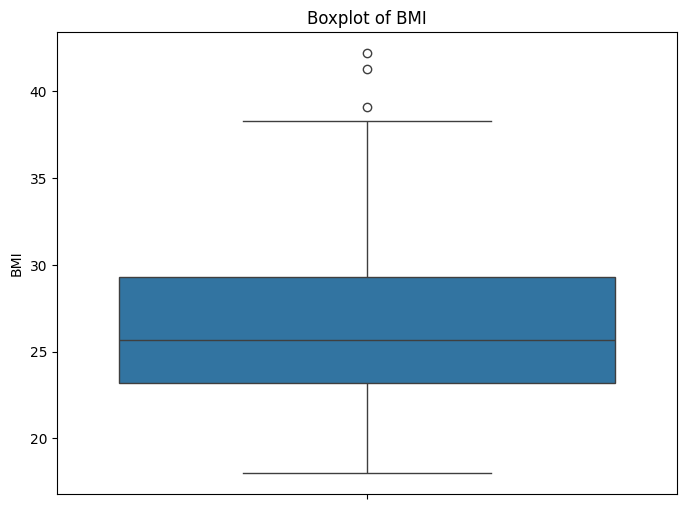

In [99]:
# Boxplot
print(df['BMI'].describe())
plt.figure(figsize=(8,6))
sns.boxplot(df['BMI'])
plt.title('Boxplot of BMI')
plt.show()


There EXIST outliers in BMI column

By seeing the boxplot , we can say that the average BMI and median are close, indicating that the data is close to being normally distributed

Distributon check

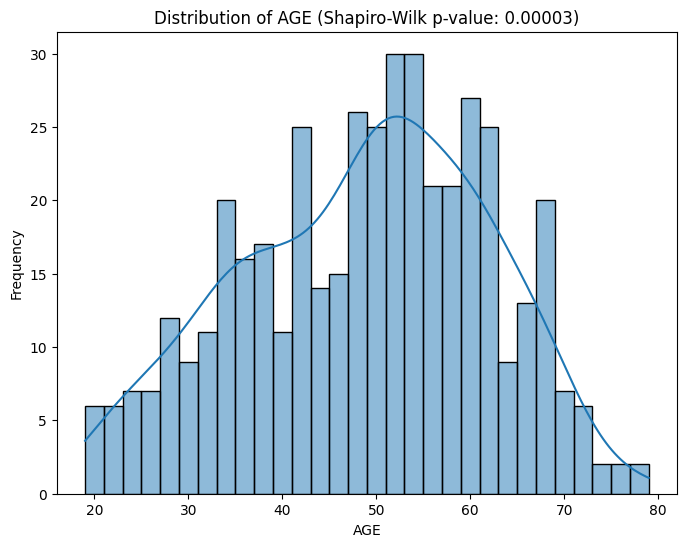

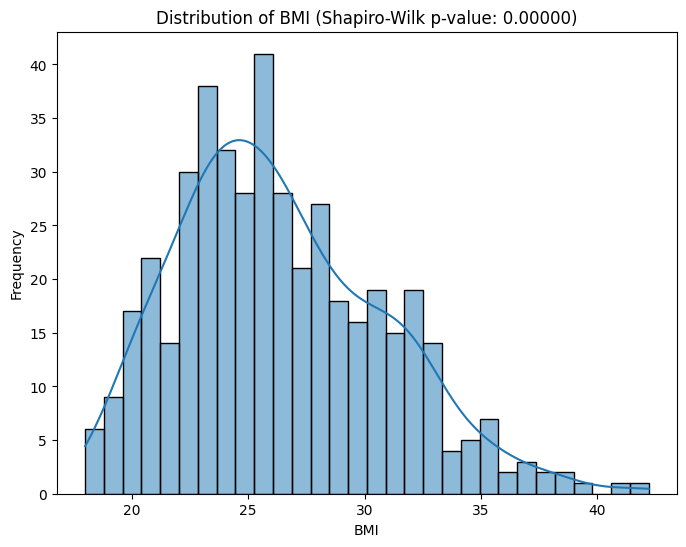

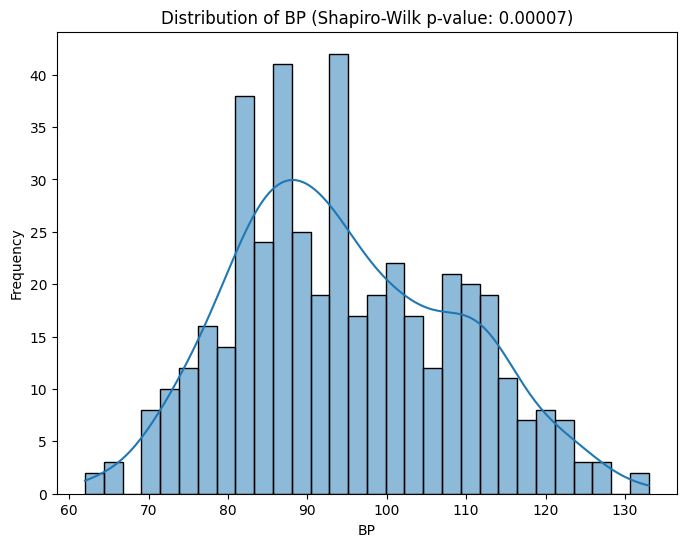

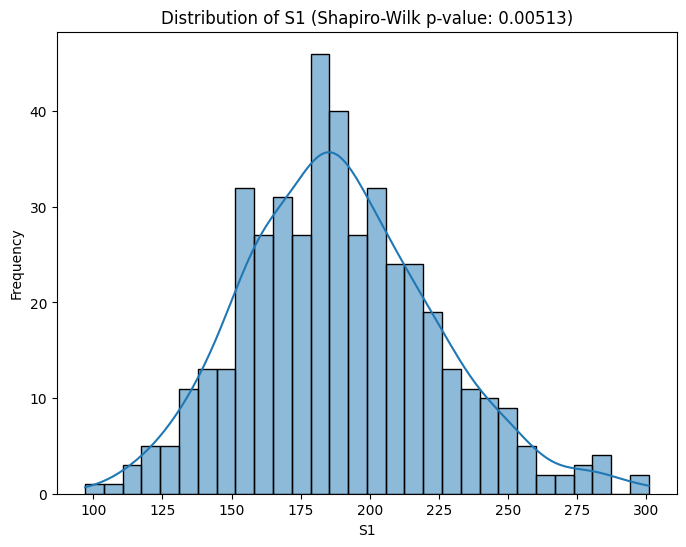

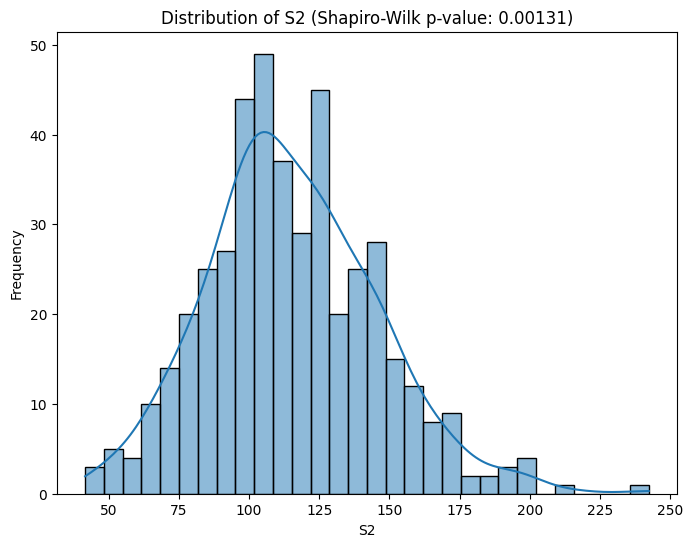

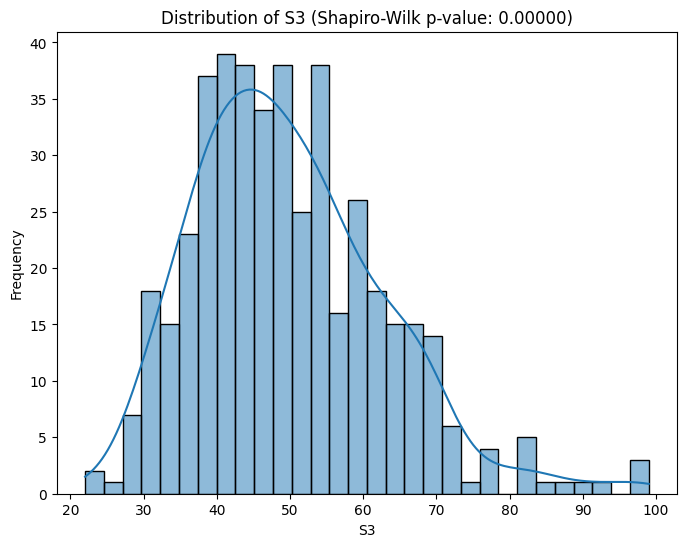

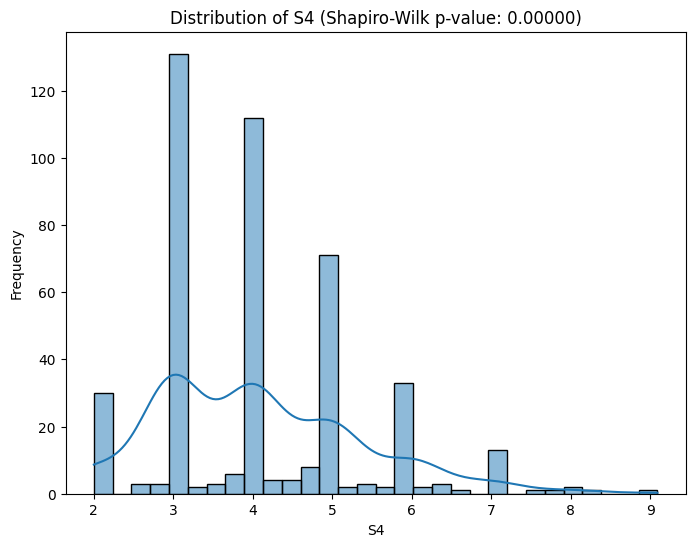

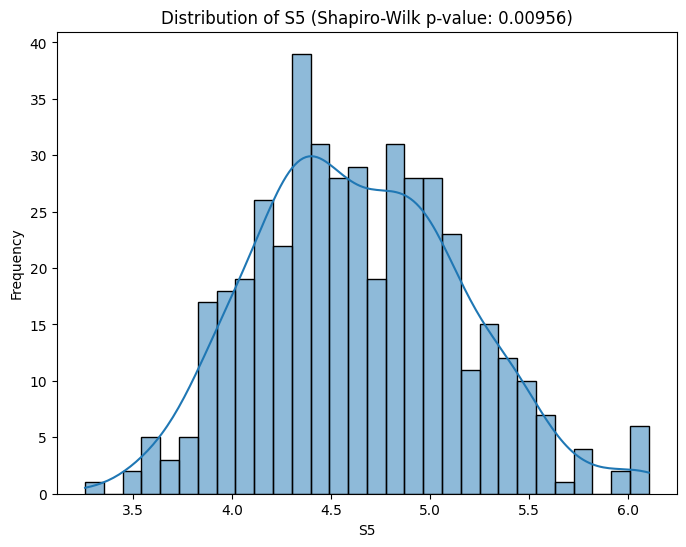

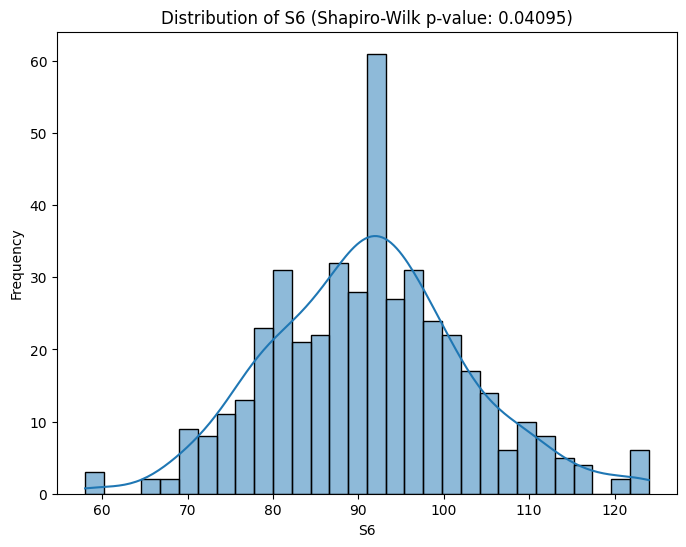

AGE:
  Statistic: 0.98236
  p-value: 0.00003
  Normality: Not Gaussian (reject H0)

BMI:
  Statistic: 0.97282
  p-value: 0.00000
  Normality: Not Gaussian (reject H0)

BP:
  Statistic: 0.98369
  p-value: 0.00007
  Normality: Not Gaussian (reject H0)

S1:
  Statistic: 0.99028
  p-value: 0.00513
  Normality: Not Gaussian (reject H0)

S2:
  Statistic: 0.9883
  p-value: 0.00131
  Normality: Not Gaussian (reject H0)

S3:
  Statistic: 0.96317
  p-value: 0.00000
  Normality: Not Gaussian (reject H0)

S4:
  Statistic: 0.92356
  p-value: 0.00000
  Normality: Not Gaussian (reject H0)

S5:
  Statistic: 0.99115
  p-value: 0.00956
  Normality: Not Gaussian (reject H0)

S6:
  Statistic: 0.99312
  p-value: 0.04095
  Normality: Not Gaussian (reject H0)



In [107]:

from scipy import stats

# List of columns to perform the Shapiro-Wilk test
columns_to_test = ['AGE', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']

# Dictionary to store the results
normality_results = {}

# Loop through each column
for column in columns_to_test:
    # Perform Shapiro-Wilk test
    stat, p_value = stats.shapiro(df[column])
    normality_results[column] = {
        'Statistic': stat,
        'p-value': p_value,
        'Normality': 'Gaussian (fail to reject H0)' if p_value > 0.05 else 'Not Gaussian (reject H0)'
    }

    # Plot the distribution (histogram + KDE)
    plt.figure(figsize=(8,6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column} (Shapiro-Wilk p-value: {p_value:.5f})')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Display the normality test results
for column, result in normality_results.items():
    print(f"{column}:")
    print(f"  Statistic: {result['Statistic']:.5}")
    print(f"  p-value: {result['p-value']:.5f}")
    print(f"  Normality: {result['Normality']}")
    print()


  Boxplot of all features

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


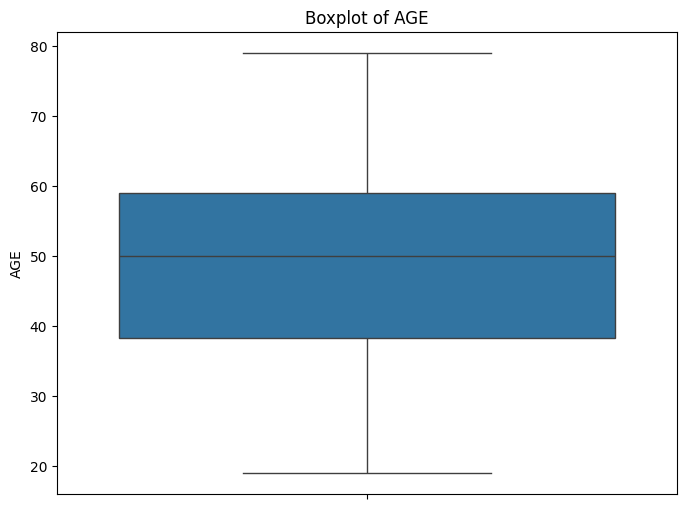

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


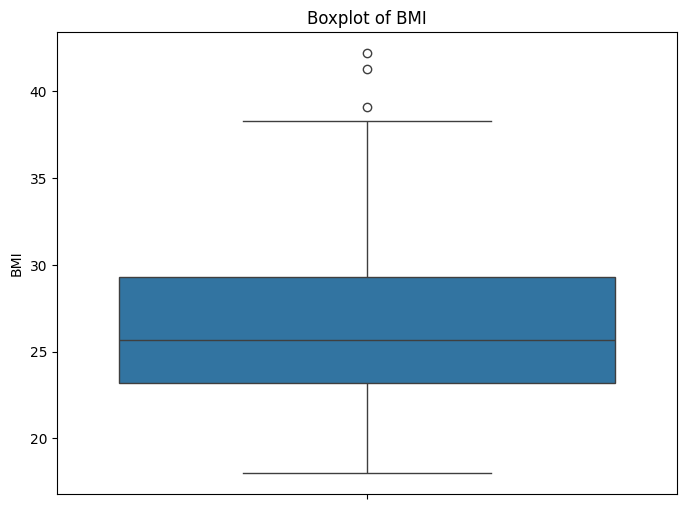

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


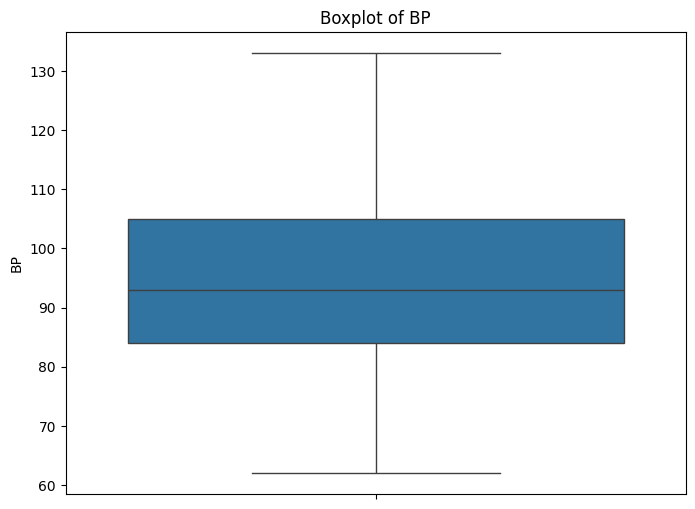

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


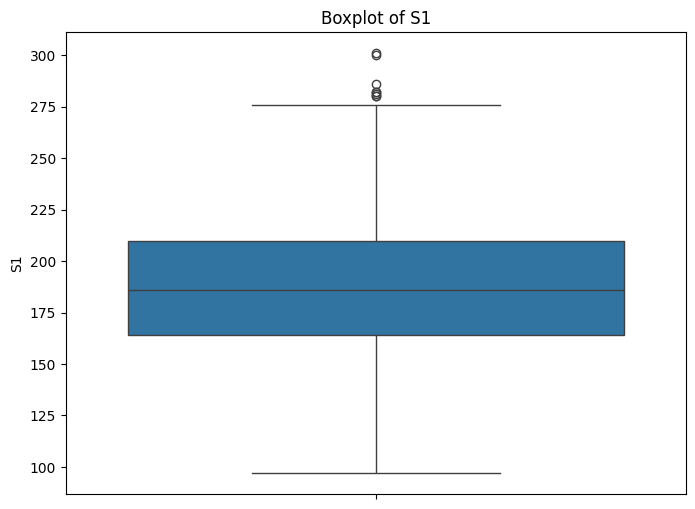

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


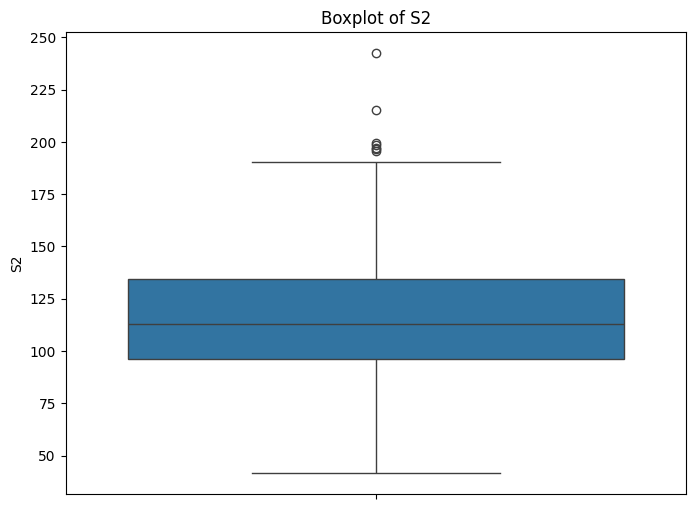

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


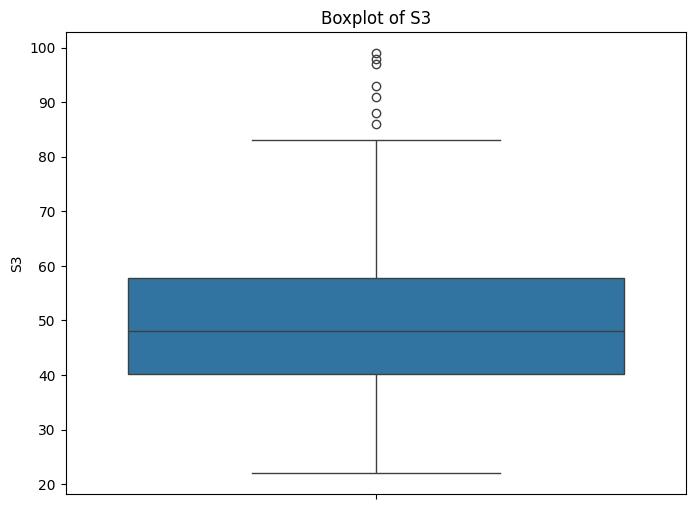

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


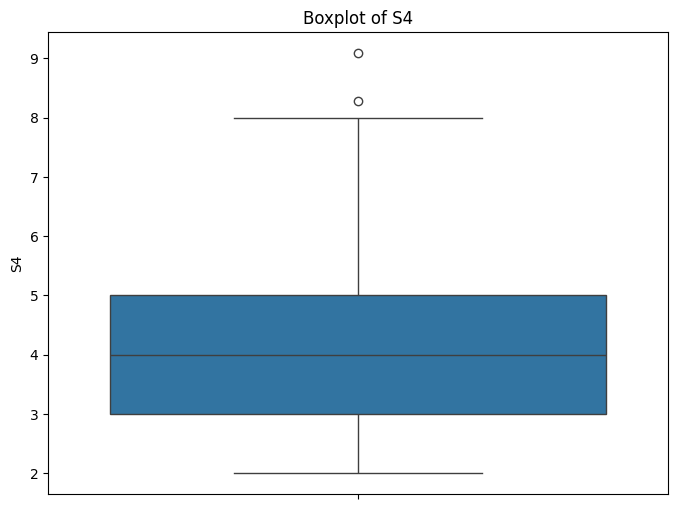

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


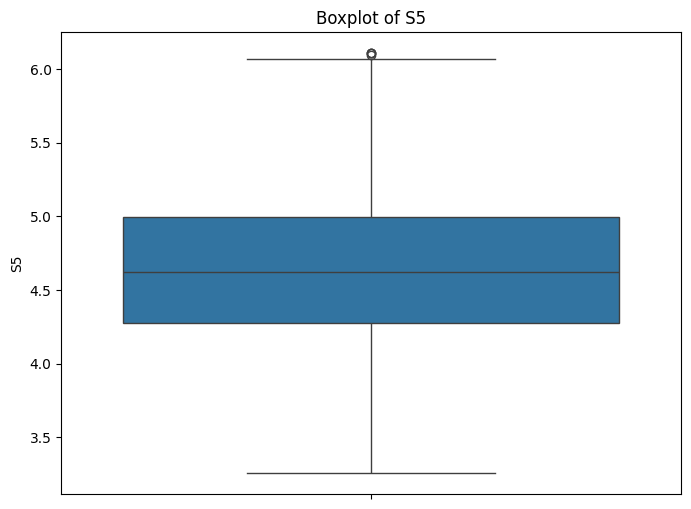

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


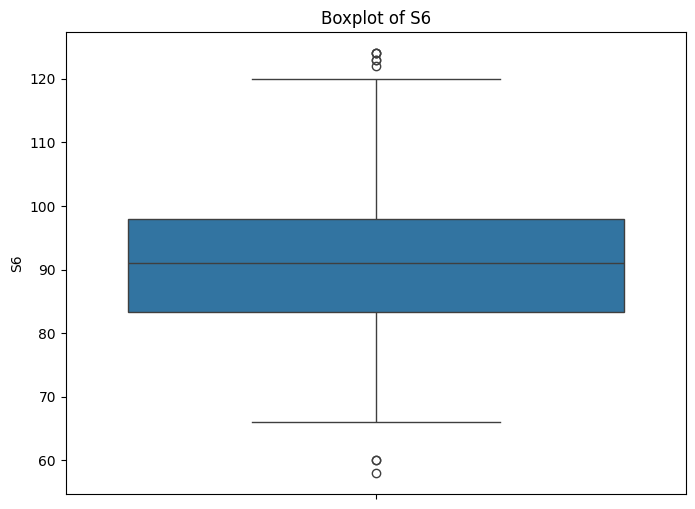

In [108]:
# List of columns to display boxplots
columns_to_plot = ['AGE', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']

# Loop through each column and plot a boxplot
for column in columns_to_plot:
    plt.figure(figsize=(8,6))
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


# Insightfulness of observations and analysis

Printing all outliers

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

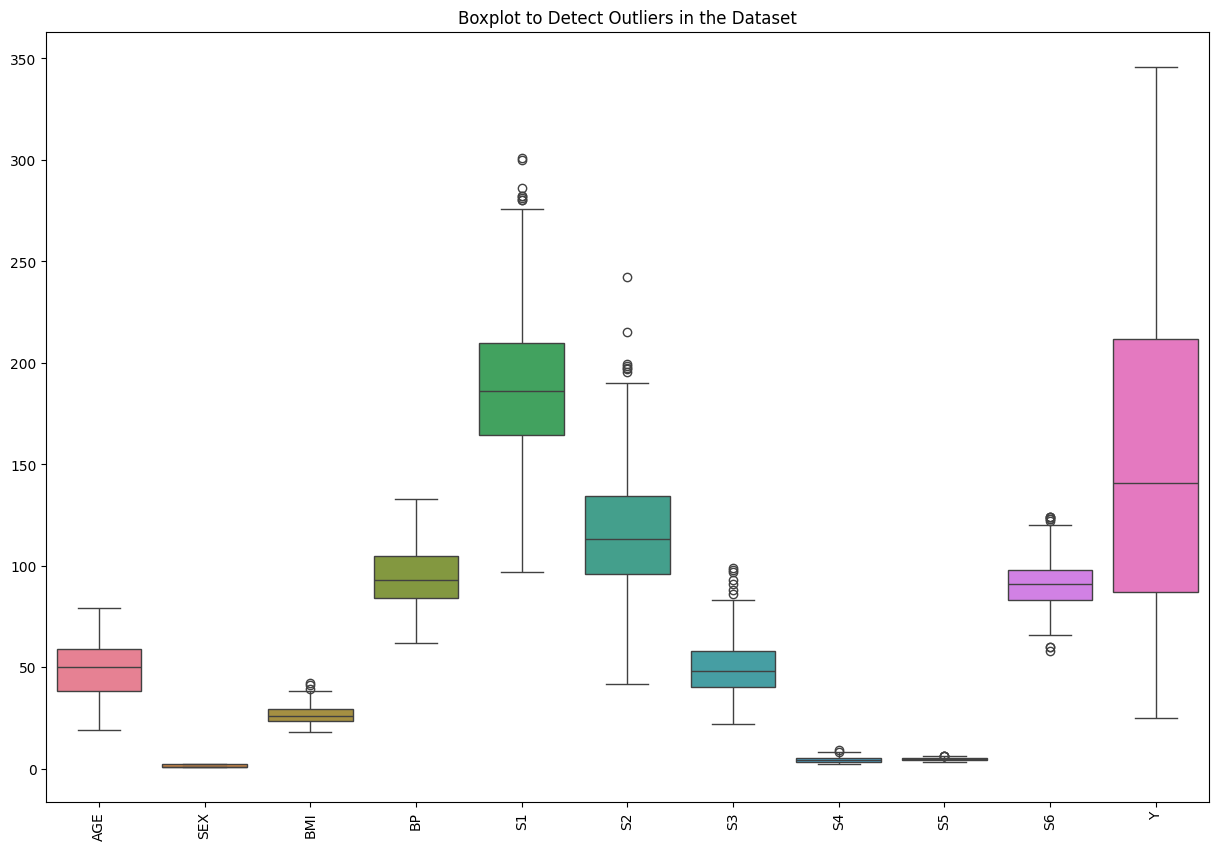

In [54]:
# Setting up the figure for multiple boxplots
plt.figure(figsize=(15,10))

# Plotting boxplots for each column in the dataset to detect outliers
sns.boxplot(data=df)

# Displaying the plot
plt.xticks(rotation=90)
plt.title('Boxplot to Detect Outliers in the Dataset')
plt.show()

In [66]:
detecting_outliers=df[((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
detecting_outliers

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
23,61,2,32.0,103.67,210,85.2,35.0,6.00,6.1070,124,245
35,62,2,23.5,80.33,225,112.8,86.0,2.62,4.8752,96,102
58,60,1,20.4,105.00,198,78.4,99.0,2.00,4.6347,79,170
84,49,1,22.7,65.33,168,96.2,62.0,2.71,3.8918,60,65
117,65,1,24.4,120.00,222,135.6,37.0,6.00,5.5094,124,281
123,50,2,29.6,94.33,300,242.4,33.0,9.09,4.8122,109,84
141,41,1,30.8,81.00,214,152.0,28.0,7.60,5.1358,123,317
161,36,2,32.3,115.00,286,199.4,39.0,7.00,5.4723,112,217
168,49,2,31.9,94.00,234,155.8,34.0,7.00,5.3982,122,268
169,48,1,23.9,109.00,232,105.2,37.0,6.00,6.1070,96,152


In [67]:
detecting_outliers.shape

(31, 11)

Replacing/Deleting outliers

In [61]:
outliers

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
437,False,False,False,False,False,False,False,False,False,False,False
438,False,False,False,False,False,False,False,False,False,False,False
439,False,False,False,False,False,False,False,False,False,False,False
440,False,False,False,False,False,False,False,False,False,False,False


In [62]:
outliers.shape

(442, 11)

In [60]:
df_clean = df[~outliers.any(axis=1)]
df_clean

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
436,33,1,19.5,80.00,171,85.4,75.0,2.00,3.9703,80,48
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132


In [ ]:
df_clean.shape

(411, 11)

In [69]:
outliers_clean = (df_clean < (Q1 - 1.5 * IQR)) | (df_clean > (Q3 + 1.5 * IQR))

outliers_clean

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
436,False,False,False,False,False,False,False,False,False,False,False
437,False,False,False,False,False,False,False,False,False,False,False
438,False,False,False,False,False,False,False,False,False,False,False
439,False,False,False,False,False,False,False,False,False,False,False


In [70]:
outliers_per_column_clean = outliers_clean.sum()
outliers_per_column_clean

,0
AGE,0
SEX,0
BMI,0
BP,0
S1,0
S2,0
S3,0
S4,0
S5,0
S6,0


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

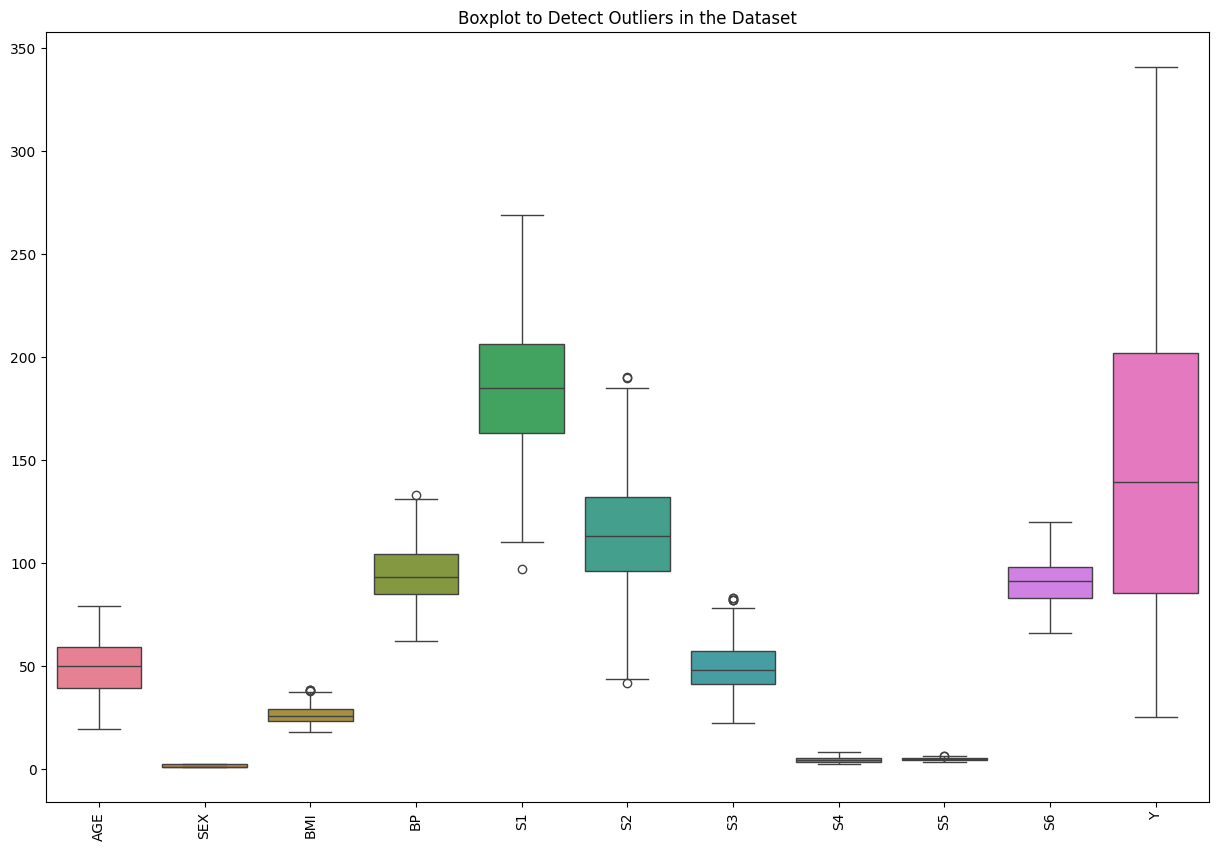

In [71]:
# Setting up the figure for multiple boxplots
plt.figure(figsize=(15,10))

# Plotting boxplots for each column in the dataset to detect outliers
sns.boxplot(data=df_clean)

# Displaying the plot
plt.xticks(rotation=90)
plt.title('Boxplot to Detect Outliers in the Dataset')
plt.show()

## 3. Perform EDA on data

i) List the most variables (Feature Importance) that will affect the target
label.

In [73]:
import matplotlib.pyplot as plt

Scatterplot between age and Y

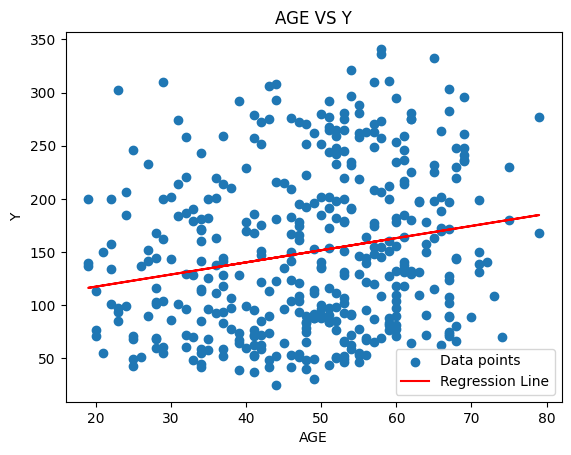

In [72]:
plt.scatter(df_clean['AGE'],df_clean['Y'],label='Data points')
slope, intercept = np.polyfit(df_clean['AGE'], df_clean['Y'], 1)

regression_line = slope * df_clean['AGE'] + intercept

# Plotting regression line
plt.plot(df_clean['AGE'], regression_line, color='red', label='Regression Line')

plt.xlabel('AGE')
plt.ylabel('Y')
plt.title("AGE VS Y")
plt.legend()
plt.show()


Scatterplot between BMI and Y

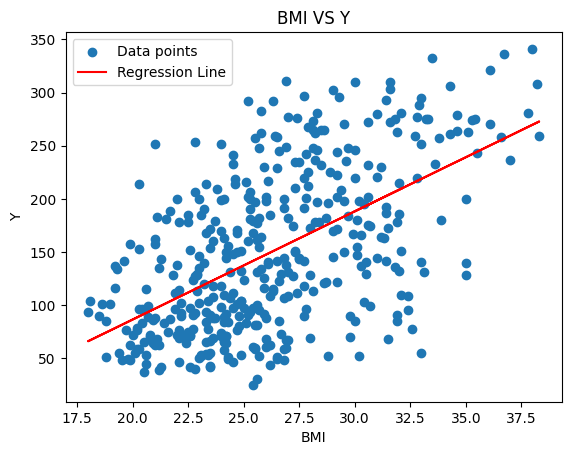

In [74]:
plt.scatter(df_clean['BMI'],df_clean['Y'],label='Data points')
slope,intercept=np.polyfit(df_clean['BMI'],df_clean['Y'],1)
regression_line=slope*df_clean['BMI']+intercept

plt.plot(df_clean['BMI'],regression_line,color='red',label='Regression Line')

plt.xlabel('BMI')
plt.ylabel('Y')
plt.title("BMI VS Y")
plt.legend()
plt.show()

Scatterplot betweenn BP and Y

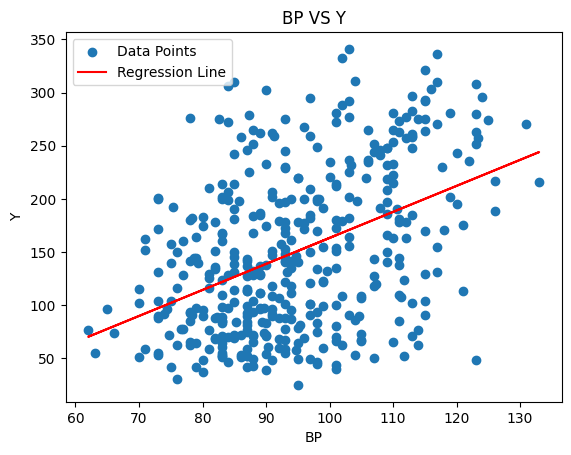

In [75]:
plt.scatter(df_clean['BP'],df_clean['Y'],label='Data Points')
slope,intercept=np.polyfit(df_clean['BP'],df_clean['Y'],1)
regression_line=slope*df_clean['BP']+intercept

plt.plot(df_clean['BP'],regression_line,color='red',label='Regression Line')

plt.xlabel('BP')
plt.ylabel('Y')
plt.title("BP VS Y")
plt.legend()
plt.show()

Scatterplot between S1 and Y

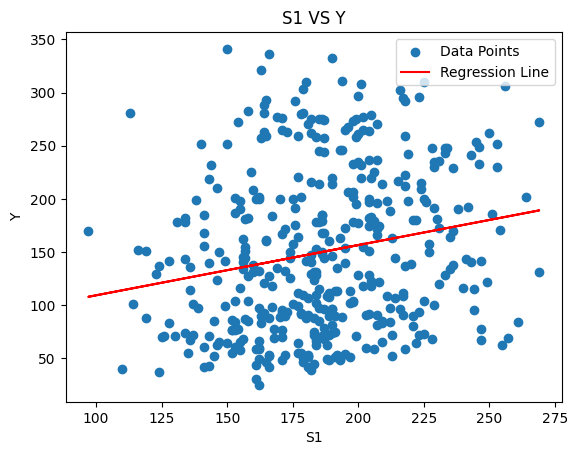

In [76]:
plt.scatter(df_clean['S1'],df_clean['Y'],label='Data Points')
slope,intercept=np.polyfit(df_clean['S1'],df_clean['Y'],1)
regression_line=slope*df_clean['S1']+intercept

plt.plot(df_clean['S1'],regression_line,color='red',label='Regression Line')

plt.xlabel('S1')
plt.ylabel('Y')
plt.title("S1 VS Y")
plt.legend()
plt.show()

S1 is positively correlated with target variable Y

Scatterplot between S2 and Y



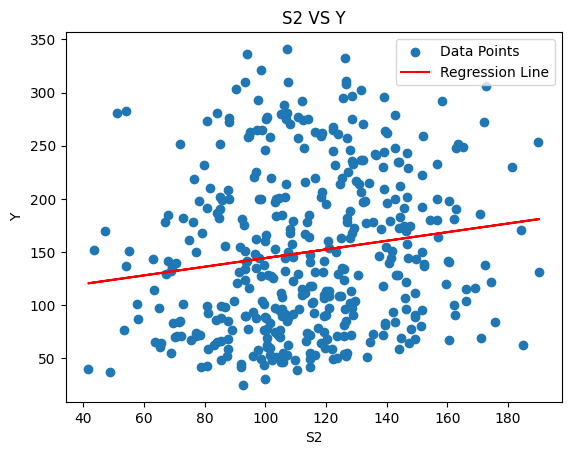

In [77]:
plt.scatter(df_clean['S2'],df_clean['Y'],label='Data Points')
slope,intercept=np.polyfit(df_clean['S2'],df_clean['Y'],1)
regression_line=slope*df_clean['S2']+intercept

plt.plot(df_clean['S2'],regression_line,color='red',label='Regression Line')

plt.xlabel('S2')
plt.ylabel('Y')
plt.title("S2 VS Y")
plt.legend()
plt.show()

S2 is somewhat positively correlated with the target variable Y

Scatterplot between S3 and Y

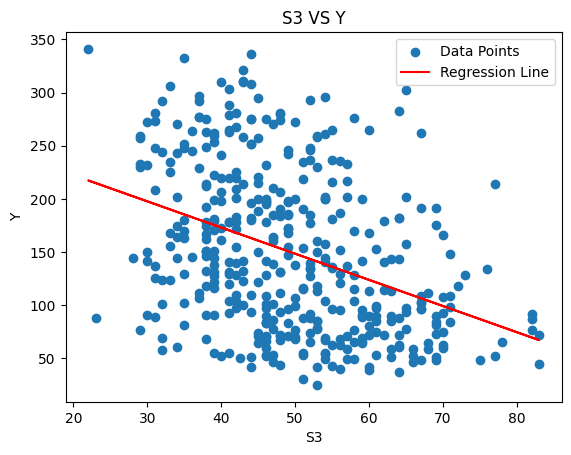

In [78]:
plt.scatter(df_clean['S3'],df_clean['Y'],label='Data Points')
slope,intercept=np.polyfit(df_clean['S3'],df_clean['Y'],1)
regression_line=slope*df_clean['S3']+intercept

plt.plot(df_clean['S3'],regression_line,color='red',label='Regression Line')

plt.xlabel('S3')
plt.ylabel('Y')
plt.title("S3 VS Y")
plt.legend()
plt.show()

S3 is negatively correlated with the target variable Y

Scatterplot between S4 and Y

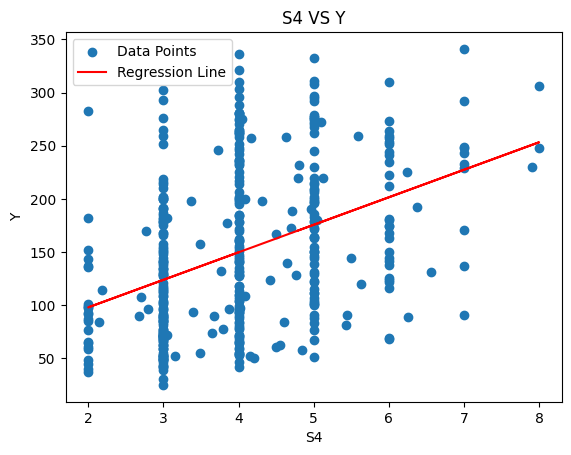

In [79]:
plt.scatter(df_clean['S4'],df_clean['Y'],label='Data Points')
slope,intercept=np.polyfit(df_clean['S4'],df_clean['Y'],1)
regression_line=slope*df_clean['S4']+intercept

plt.plot(df_clean['S4'],regression_line,color='red',label='Regression Line')

plt.xlabel('S4')
plt.ylabel('Y')
plt.title("S4 VS Y")
plt.legend()
plt.show()

S4 is postively correlated with the target variable Y

Scatterplot between S5 and Y

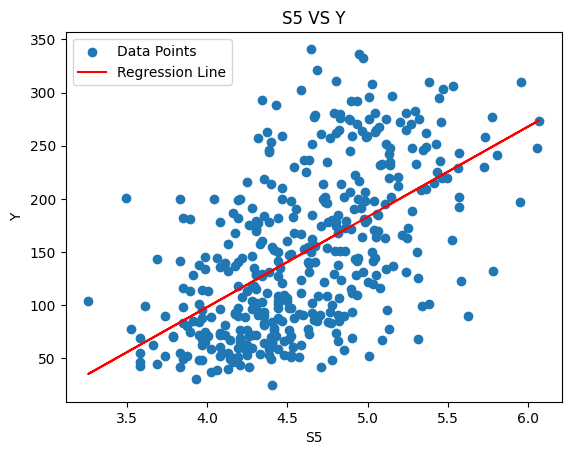

In [80]:
plt.scatter(df_clean['S5'],df_clean['Y'],label='Data Points')
slope,intercept=np.polyfit(df_clean['S5'],df_clean['Y'],1)
regression_line=slope*df_clean['S5']+intercept

plt.plot(df_clean['S5'],regression_line,color='red',label='Regression Line')

plt.xlabel('S5')
plt.ylabel('Y')
plt.title("S5 VS Y")
plt.legend()
plt.show()

S5 is positively correlated with the target variable Y

Scatterplot between S6 and Y

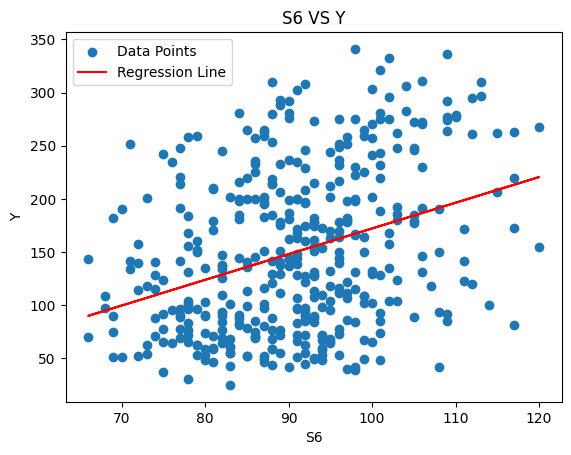

In [81]:
plt.scatter(df_clean['S6'],df_clean['Y'],label='Data Points')
slope,intercept=np.polyfit(df_clean['S6'],df_clean['Y'],1)
regression_line=slope*df_clean['S6']+intercept

plt.plot(df_clean['S6'],regression_line,color='red',label='Regression Line')

plt.xlabel('S6')
plt.ylabel('Y')
plt.title("S6 VS Y")
plt.legend()
plt.show()

S6 is positively correlated with target variable Y

ii) Present dependencies and correlations among the various features in the data.

Pearson correlation coefficient

In [87]:
corr_matrix=df_clean.corr()
corr_matrix

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.175548,0.218316,0.332747,0.290889,0.254210,-0.108598,0.244203,0.294916,0.331997,0.199981
SEX,0.175548,1.000000,0.044406,0.236720,0.021653,0.132765,-0.383055,0.333269,0.134441,0.177558,0.024965
BMI,0.218316,0.044406,1.000000,0.415839,0.238455,0.230992,-0.335251,0.374908,0.441466,0.352103,0.568104
BP,0.332747,0.236720,0.415839,1.000000,0.246225,0.190394,-0.169396,0.252725,0.381064,0.374811,0.437351
S1,0.290889,0.021653,0.238455,0.246225,1.000000,0.903646,0.060475,0.523832,0.485712,0.299779,0.198914
S2,0.254210,0.132765,0.230992,0.190394,0.903646,1.000000,-0.181719,0.653139,0.297595,0.270555,0.151457
S3,-0.108598,-0.383055,-0.335251,-0.169396,0.060475,-0.181719,1.000000,-0.750403,-0.410116,-0.240353,-0.382829
S4,0.244203,0.333269,0.374908,0.252725,0.523832,0.653139,-0.750403,1.000000,0.596846,0.356825,0.409703
S5,0.294916,0.134441,0.441466,0.381064,0.485712,0.297595,-0.410116,0.596846,1.000000,0.419098,0.558874
S6,0.331997,0.177558,0.352103,0.374811,0.299779,0.270555,-0.240353,0.356825,0.419098,1.000000,0.341035


HEATMAP

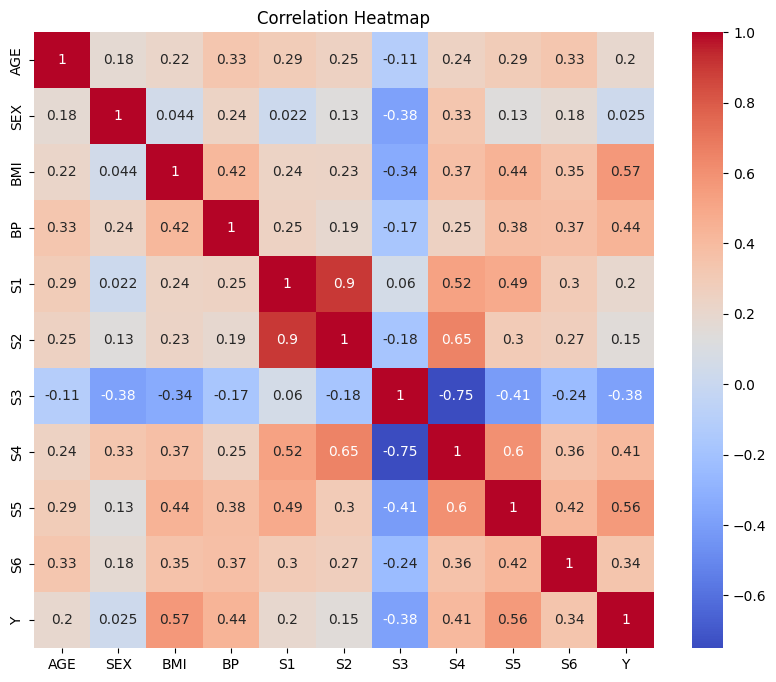

In [85]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**By looking at the heatmap upfrontly, the features BMI and S5 can affect more of the target variable than the other features**

The features S1 and S2 have a high correlation, so we need to perform multi-colinearity test

In [88]:
# Calculate correlation coefficient
correlation = df_clean['S1'].corr(df['S2'])
print("Correlation coefficient:", correlation)

# Calculate VIF
vif = 1 / (1 - correlation**2)
print("VIF:", vif)

Correlation coefficient: 0.9036457063305384
VIF: 5.451836265707749


The Correlation coefficient value indicates a strong positive correlation between the two variables S1 and S2.
This means that as one variable increases, the other tends to increase as well, and vice versa.

In [89]:
high_corr = corr_matrix[(corr_matrix > 0.7) | (corr_matrix < -0.7)]
print(high_corr)

     AGE  SEX  BMI   BP        S1        S2        S3        S4   S5   S6    Y
AGE  1.0  NaN  NaN  NaN       NaN       NaN       NaN       NaN  NaN  NaN  NaN
SEX  NaN  1.0  NaN  NaN       NaN       NaN       NaN       NaN  NaN  NaN  NaN
BMI  NaN  NaN  1.0  NaN       NaN       NaN       NaN       NaN  NaN  NaN  NaN
BP   NaN  NaN  NaN  1.0       NaN       NaN       NaN       NaN  NaN  NaN  NaN
S1   NaN  NaN  NaN  NaN  1.000000  0.903646       NaN       NaN  NaN  NaN  NaN
S2   NaN  NaN  NaN  NaN  0.903646  1.000000       NaN       NaN  NaN  NaN  NaN
S3   NaN  NaN  NaN  NaN       NaN       NaN  1.000000 -0.750403  NaN  NaN  NaN
S4   NaN  NaN  NaN  NaN       NaN       NaN -0.750403  1.000000  NaN  NaN  NaN
S5   NaN  NaN  NaN  NaN       NaN       NaN       NaN       NaN  1.0  NaN  NaN
S6   NaN  NaN  NaN  NaN       NaN       NaN       NaN       NaN  NaN  1.0  NaN
Y    NaN  NaN  NaN  NaN       NaN       NaN       NaN       NaN  NaN  NaN  1.0


So, to prevent multicollinearity, we can merge the features into single column or we can remove either s1 or s2

# 4- State limitations/issues (if any) with the given dataset.



I) Scalability concern: The dataset is small with only 442 rows, which might limit its effectiveness for training complex machine learning models without additional data.

II) Correlated Features: Features may be highly correlated with each other, leading to multicollinearity, which can distort statistical analysis or regression models.




